# Groundstate Wave Function for a Particle in a Box
## Zaki Salma 18012088


The Schrodinger equation for a particle in a box with V = 0 in the box and V = $\infty$ outisde of the box is given by,

$$-\frac{{1} }{2} \frac{d^2}{dx^2}\psi(x) = E \psi(x)$$

for $m_e$ = $\hbar$ = 1, with energy and distance measured in atomic units of Hartrees (Ha) and Borh radii ($a_0$) respectively.

The groundstate wave function $\psi _1(x)$ can be solved for by choosing an energy value E that 'traps' the wave function between x = 0 and x = 1 ($\psi _1(0) = \psi _1(1) = 0$)

In [1]:
#Importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
#Differentials
def RHS_Schro(y,E):
    """Implement RHS of Schrodinger equation
    
    Input:
    y  input values (two component array)
    E  Energy
    Output:
    Differentials (two component array)
    """
    # Separate input
    psi = y[0]
    phi = y[1]
    # Calculate differentials
    dpsi = phi
    dphi = -2*E*psi
    return np.array((dpsi,dphi))

#Runge-Kutta Solver
def RK4_solver(fun,y0,dx,E,N):
    """Solve dy/dt = fun(y,t) using fourth-order RK method.
    Inputs:
    fun  f(y,t)
    y0   Initial condition - assumed to be two-component
    dx   Spacing in x
    E    Parameter to pass to fun
    N    Number of steps
    Returns: two arrays of length N+1
    """
    #Create arrays
    x = np.zeros(N+1)
    v = np.zeros(N+1)
    
    #Initial values
    x[0] = y0[0]
    v[0] = y0[1]
    
    y = y0
    #Runge Kutta...
    for i in range(N):
        k1 = dx*fun(y,E)
        k2 = dx*fun(y+0.5*k1,E+0.5*dx)
        k3 = dx*fun(y+0.5*k2,E+0.5*dx)
        k4 = dx*fun(y+k3,E+dx)
        y = y + (k1+2*k2+2*k3+k4)/6
        x[i+1] = y[0]
        v[i+1] = y[1]
    return x,v

#Second Derivative Calculator
def d2f(f,dx):
    """
    Calculates the second derivative of a function.
    
    Inputs: f - array of y values ; dx - grid spacing
    
    Ouputs: array of y'' values
    """
    #Forward and backward shift
    f_m  = np.roll(f,1)  #f(x-dx) 
    f_p  = np.roll(f,-1) # f(x+dx)
    
    #2nd derivative
    d2f = (f_m + f_p - 2*f)/(dx*dx)
    return d2f

#Plotting Function
def plot(title,xlabel,ylabel,x,y):
    """
    Plots a curve.
    
    Inputs: title - graph title ; xlabel/ylabel - labels for each axis ; x - x values to plotted against ; 
                    y - y values 
    
    Outputs: A graph showing the plot
    
    """
    #Figure and Axes
    fig = plt.figure(figsize=(12.8,6.4))
    ax = fig.add_subplot(111)

    #Title and labels
    ax.set_title(title,fontdict = {'size':20})
    ax.set_xlabel(xlabel,fontdict = {'size':20})
    ax.set_ylabel(ylabel,fontdict = {'size':20})
    
    #Plot function
    ax.plot(x,y)

    #Grid
    plt.grid(True)

#Bisection Routine
def bisection(f,a,b,tol,f_s,y0,dx,N):
    """
    Calculates Energy value required for f(1) = 0 by method of bisection
    
    Input: f - function ; a/b - Two bracket points a and b ; tol - tolerance ; f_s - additional function(Differentials) ; 
           y0 - initial y value ; dx - step ; N - number of x points
    
    Ouput: E value that satisfies f(1) = 0
    
    """
    
    n = 0
    while abs(b-a) > tol:
        #Number of iterations
        n+=1
        #Average
        c = (b+a)/2
        
        #Function values
        fc = f(f_s,y0,dx,c,N)[0][np.where(x==1)]
        fa = f(f_s,y0,dx,a,N)[0][np.where(x==1)]
        
        #Checks...
        if fc == 0.0:
            break

        elif fa * fc < 0:
            b = c

        else:
            a = c
    return np.array([a,n])

## Wave Function for E = 1

Wavefunction is plot for a starting energy value of $E = 1$ (Ha)

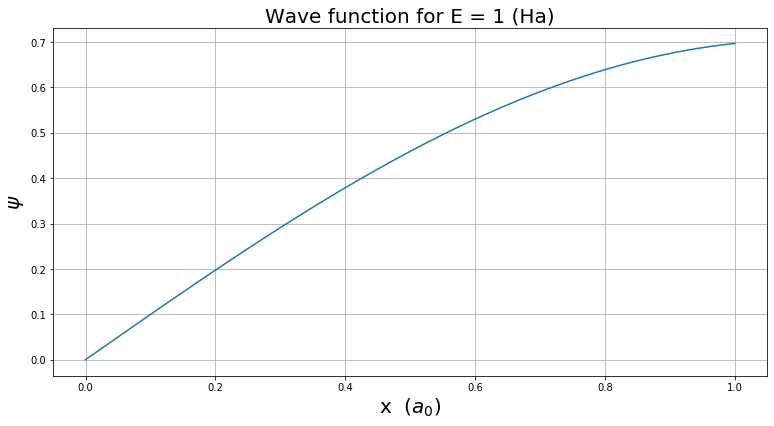

In [3]:
#Defining Variables
dx = 0.01
total_x = 1
a = 1
E0 = 1
#Values of psi and phi at x = 0
y0 = [0.0,a] 
#Number of points
N = int(total_x/dx)
#x values
x = np.arange(0,total_x+dx*0.5,dx)
#Psi values
psi = RK4_solver(RHS_Schro,y0,dx,E0,N)[0]

#Plots for psi against x
plot('Wave function for E = 1 (Ha)','x  ($a_0$)','$\psi$',x,psi)


## Bisection

Uses a simple bisection routine to find the value of $E$ that results in $\psi(1) = 0$

In [4]:
tol = 1e-3

#Lower and upper energy values
E0 = 1.0
E1 = 11.0

#Wave function values at x = 1
P0 = RK4_solver(RHS_Schro,y0,dx,E0,N)[0][np.where(x==1)]
P1 = RK4_solver(RHS_Schro,y0,dx,E1,N)[0][np.where(x==1)]

#Bisection
Ef, n = bisection(RK4_solver,E0,E1,tol,RHS_Schro,y0,dx,N)
print('Ground state eigen value: {0} (Ha) found in {1} attempts'.format(Ef,n))

Ground state eigen value: 4.929443359375 (Ha) found in 14.0 attempts


## Normalised Wave Function

A normalised 1d function must satisfy,  
$$\int |\psi(x)|^2 dx = 1$$
so to normalise the $\psi_0(x)$ values above, 
$$\psi_{norm}(x) = \frac{\psi_1(x)}{\sqrt{A}}$$
where $A$ is given by,
$$ A = \int |\psi_1(x)|^2 dx$$

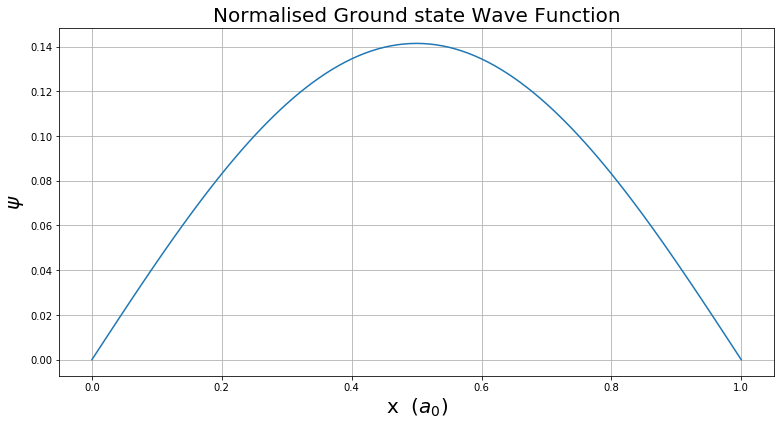

In [5]:
#Psi values at groundstate energy
psi = (RK4_solver(RHS_Schro,y0,dx,Ef,N)[0])

#Integrate for A
norm = integrate.simps(psi**2)
#Normalise psi
psi = psi/np.sqrt(norm)

#Plot Normalised psi against x
plot('Normalised Ground state Wave Function','x  ($a_0$)',r'$\psi$',x,psi)

## Analytic Wave Function Solution

Analytically, the ground state wavefunction is given by,

$$\psi_a(x) = Bsin(kx) ; \space \space \space \space k = \pi$$

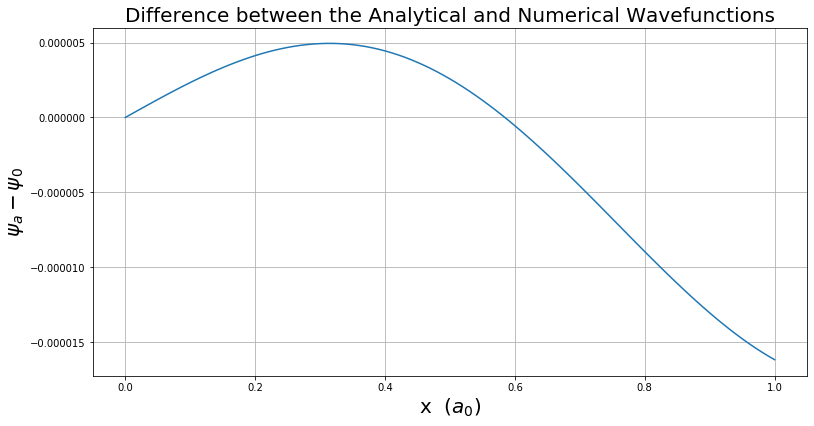

In [6]:
#Define variables
k = np.pi
B = 1

#Analytic psi values
psi_ana = B*np.sin(k*x)

#Integrate for B
norm = integrate.simps(psi_ana**2)
#Normalise psi
psi_ana = psi_ana/np.sqrt(norm)

#Plots the difference between the numeric and analytic wave functions
plot('Difference between the Analytical and Numerical Wavefunctions','x  ($a_0$)',r'$\psi_a - \psi_0 $',x,(psi_ana - psi))

## Energy Evaluation for Known Wave Function

Now instead, calculating the energy from the known form of the wave function using,

$$E = \int -\frac{1}{2}\psi(x)\frac{d^2}{dx^2}\psi(x)  dx $$

The eigen-values for the particle in a box system is given by,
$$E_n = \frac{n^2\pi^2\hbar^2}{2m_eL^2}$$

so for $L = n = m_e = \hbar = 1$ , 
$$E_1 = \frac{\pi^2}{2} \approx 4.9348$$
to 5 sf

In [7]:
#Energy for numeric/analytic/exact psi values
E_1 = 0.5*np.pi**2
E_A = integrate.simps(-0.5*psi_ana*d2f(psi_ana,dx))
E_N = Ef

#Output Energy values
print(' Energy values:\n\n Exact value:        {0}\n For analytical psi: {1}\n For numerical psi:  {2} '.format(E_1,E_A,E_N))

 Energy values:

 Exact value:        4.934802200544679
 For analytical psi: 4.934396342684226
 For numerical psi:  4.929443359375 


## Conclusions:

As can be seen from the difference plot, the psi values from the analytical wavefunction are greater than the numerical value for $0  < x \lessapprox 0.6$ and are smaller for $ x\gtrapprox 0.6$. The difference between the two is dependent on the tolerance from the bisection routine above, i.e a smaller tolerance results in a smaller difference between the numerical and analytical psi values. For tolerance of order $10^{-3}$ the difference is of order $10^{-6}$, for tolerance of order $10^{-1}$ difference is order $10^{-4}$ ; difference is about an 1000th of the tollerance.

The analytical Energy is closer to the exact value (diff order $10^{-4}$) than the numerical value (diff order $10^{-2}$).